In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


We used train csv because the description want to predict price range

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [5]:
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [7]:
train.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

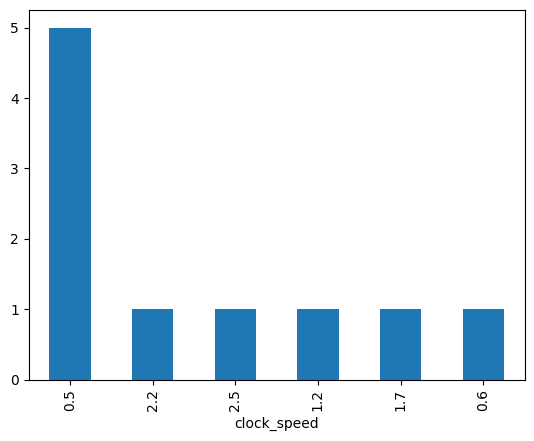

In [24]:
# Bar chart for 'battery power'
train['clock_speed'].head(10).value_counts().plot(kind='bar')
plt.show()

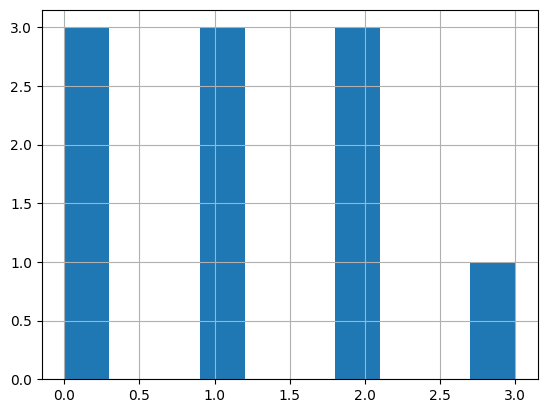

In [21]:
# Histogram for price range
train['price_range'].head(10).hist()
plt.show()

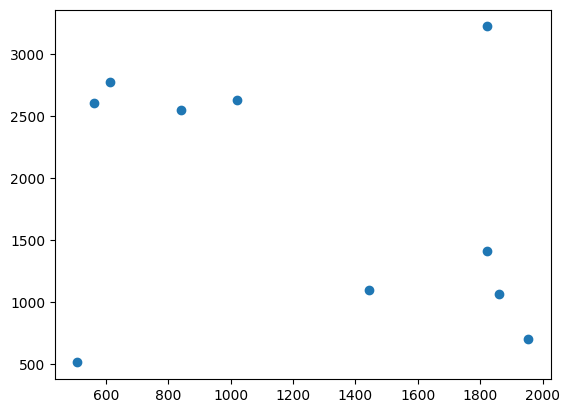

In [23]:
# Scatter plot for 'battery_power' vs. 'ram'
plt.scatter(train['battery_power'].head(10), train['ram'].head(10))
plt.show()

In [25]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [26]:
train['battery_power'].value_counts()

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64

In [27]:
train['clock_speed'].value_counts()

clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64

In [28]:
train['ram'].value_counts()

ram
1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: count, Length: 1562, dtype: int64

In [29]:
train['int_memory'].value_counts()

int_memory
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: count, Length: 63, dtype: int64

In [30]:
train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Predict price range indicating how high the price is

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load data (you probably have this)
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

# Select relevant features
features = ['battery_power', 'int_memory', 'ram', 'clock_speed']
X = train[features]
y = train['price_range']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Model creation
model = RandomForestClassifier(n_estimators=100) 

# Model training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted')) 

Accuracy: 0.8025
F1-score: 0.8061513187932066


* Accuracy (0.8025): Means that your model correctly classifies the price range of a mobile phone about 80% of the time.

* F1-Score (0.806): An F1-score of 0.806 indicates good performance

Hyperparameter Tuning for Random Forest - Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8, None],
    'criterion': ['gini', 'entropy'] 
}

# Create a new RandomForestClassifier with the best hyperparameters
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5) 
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [33]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, None],
                         'n_estimators': [50, 100, 200]})

Correlation Analysis

In [35]:
corr_matrix = train.corr()
high_corr_features = corr_matrix['price_range'].sort_values(ascending=False).head(10).index 
print(high_corr_features) 

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h'],
      dtype='object')


In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train) 

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
print(feature_importances.sort_values('importance', ascending=False))

         feature  importance
2            ram    0.691970
0  battery_power    0.168432
1     int_memory    0.080101
3    clock_speed    0.059496


Addressing Class Imbalance

In [37]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

In [38]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_train_res, y_train_res = undersample.fit_resample(X_train, y_train)

In [39]:
rf_model = RandomForestClassifier(class_weight='balanced') 

In [40]:
rf_model

RandomForestClassifier(class_weight='balanced')

In [51]:
from sklearn.preprocessing import LabelEncoder

df_label_enc = train.copy()
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df_label_enc.select_dtypes(include=['object']).columns:
    df_label_enc[column] = label_encoder.fit_transform(df_label_enc[column].astype(str))

# Separate the target variable and features
y = df_label_enc['price_range']
X_label_enc = df_label_enc.drop('price_range', axis=1)

print(X_label_enc.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0

Separate Features and Target for Model Training

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Identify categorical features
categorical_cols = train.select_dtypes(include=['object']).columns

# Create one-hot encoding transformer
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough' 
)
X_one_hot = transformer.fit_transform(train)

# Now you can do the splitting and modeling:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=42)

In [55]:
# Split the data (using one-hot encoded data as an example)
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predicted_prices = model.predict(X_test)

In [56]:
predicted_prices_df = pd.Series(predicted_prices)

In [57]:
predicted_prices_df

0      0.0
1      2.0
2      1.0
3      3.0
4      1.0
      ... 
395    3.0
396    2.0
397    1.0
398    1.0
399    2.0
Length: 400, dtype: float64

A mapping of how these numerical values correspond to actual price ranges :

* 0.0 represent 0 - 100 dollar
* 1.0 represent 101 - 200 dollar
* 2.0 represent 200 - 300 dollar
* 3.0 represent 300 - 400 dollar